In [716]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

<Axes: xlabel='left'>

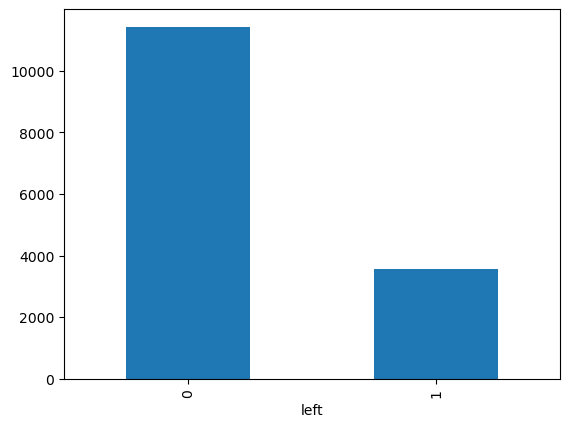

In [717]:
df =pd.read_csv('HR_comma_sep.csv')
salary = df['salary'].value_counts()
lefted = df['left'].value_counts()
lefted.plot(kind ='bar')

# plt.bar( ['small','medium','big'],salary)
# plt.bar(salary,df.left)b
# plt.show()


In [718]:

left = df[df.left==1]
left.shape

(3571, 10)

In [719]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [720]:
float_df = df.drop(['Department','salary'],axis = 'columns')
z = round(float_df.groupby('left').mean(),3)# roznice widac w satysfakcji orz w 
z

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.715,3.787,199.060,3.380,0.175,0.026
1,0.440,0.718,3.856,207.419,3.877,0.047,0.005


In [721]:
department_left_means = df.groupby(['Department'])['left'].mean()
d = department_left_means.sort_values(ascending=False)



<Axes: xlabel='Department'>

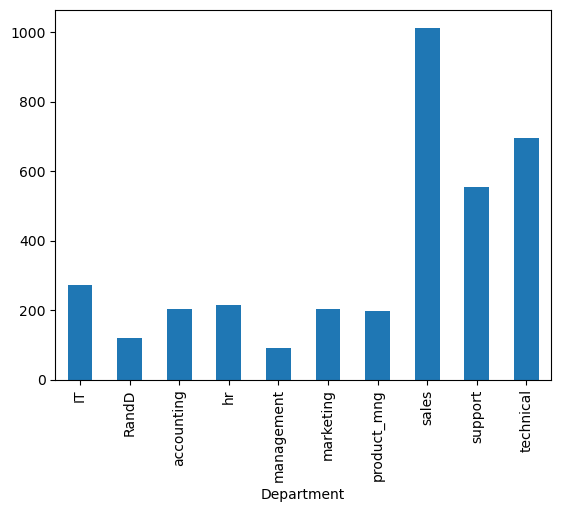

In [722]:
lefted_departament = df.groupby('Department')['left'].sum()
lefted_departament.plot(kind = 'bar')

<Axes: xlabel='salary'>

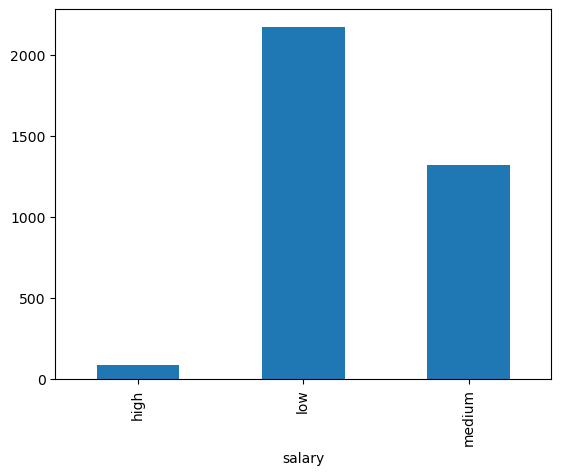

In [723]:
lefted_salary = df.groupby('salary')['left'].sum()
lefted_salary.plot(kind = 'bar')

In [724]:
def word_converter(word):
    if word =="low":
        word = 0
    elif word == "medium":
        word = 1
    elif word == "high":
        word = 2
    return word
df.salary = df.salary.apply(word_converter)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [733]:
X =df[['salary','satisfaction_level','promotion_last_5years']]
X

,salary,satisfaction_level,promotion_last_5years
0,0,0.38,0
1,1,0.80,0
2,1,0.11,0
3,0,0.72,0
4,0,0.37,0
...,...,...,...
14994,0,0.40,0
14995,0,0.37,0
14996,0,0.37,0
14997,0,0.11,0


In [726]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,df.left,test_size=0.15)

In [727]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [728]:
X_train

,salary,satisfaction_level,promotion_last_5years
3251,1,0.66,0
4243,1,0.74,0
13933,1,0.16,0
13177,0,0.87,0
1560,0,0.09,0
...,...,...,...
4889,1,0.57,0
3552,0,0.57,0
13917,1,0.42,0
1854,1,0.43,0


In [729]:
model.fit(X_train,Y_train)

LogisticRegression()

In [730]:
model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [731]:
model.score(X_test,Y_test)

0.7808888888888889

In [732]:
model.predict_proba(X_test)

array([[0.52362912, 0.47637088],
       [0.95162288, 0.04837712],
       [0.93715355, 0.06284645],
       ...,
       [0.59765082, 0.40234918],
       [0.80406496, 0.19593504],
       [0.92858341, 0.07141659]])